In [19]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
autos = pd.read_csv('./data/automobiles.csv')

# Data Camp ML Work for Logistic Regression using he UCI Automobile Data Set

In [20]:
autos.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [21]:
autos.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [22]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized_losses  159 non-null    int64  
 2   make               159 non-null    object 
 3   fuel_type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num_of_doors       159 non-null    object 
 6   body_style         159 non-null    object 
 7   drive_wheels       159 non-null    object 
 8   engine_location    159 non-null    object 
 9   wheel_base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb_weight        159 non-null    int64  
 14  engine_type        159 non-null    object 
 15  num_of_cylinders   159 non-null    object 
 16  engine_size        159 non

In [23]:
from sklearn.model_selection import train_test_split
autos['high_price'] = np.where(autos['price'] > 15000, 1, 0)
X = autos.drop(['price', 'high_price'],axis=1)
y = autos['high_price']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=731)

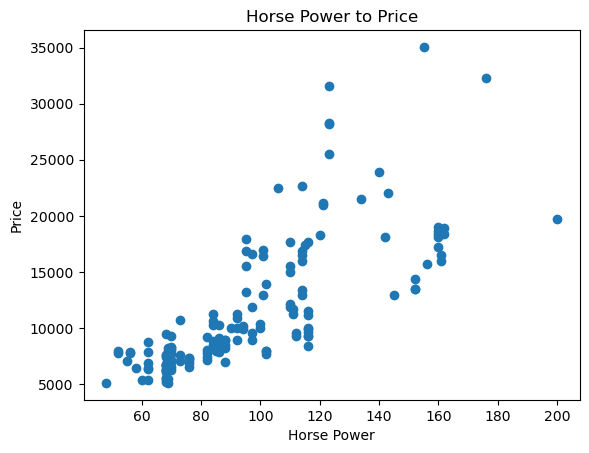

In [24]:
plt.scatter(autos['horsepower'], autos['price'])
plt.title('Horse Power to Price')
plt.ylabel('Price')
plt.xlabel('Horse Power')
plt.show()

In [25]:
autos.corr(numeric_only=True)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,high_price
symboling,1.000000,0.518344,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,-0.162794,-0.090597
normalized_losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761,0.300464
wheel_base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,0.734419,0.635170
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,0.760952,0.628819
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,0.843371,0.697922
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,0.244836,0.218061
curb_weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,0.893639,0.727830
engine_size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,0.841496,0.639605
bore,-0.256469,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850,0.533890,0.422871
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934,0.160664,-0.028800


## Sigmoid Function

The **sigmoid function** (also called the logistic function) maps any real-valued number to a value between 0 and 1, making it ideal for binary classification.

**Linear combination (z)**:

$$z = \beta_0 + \beta_1 x$$

Using our example values:
- $\beta_0 = -7$ (intercept)
- $\beta_1 = 0.05$ (coefficient for horsepower)

$$z = -7 + 0.05 \times \text{horsepower}$$

**Sigmoid/Logistic function** $h(z)$:

$$h(z) = \frac{1}{1 + e^{-z}}$$

Substituting our z:

$$h(z) = \frac{1}{1 + e^{-(-7 + 0.05 \times \text{horsepower})}}$$

This squashes the linear output into a probability between 0 and 1, where values close to 1 indicate high probability of the positive class (high_price = 1).

<Axes: xlabel='horsepower', ylabel='high_price'>

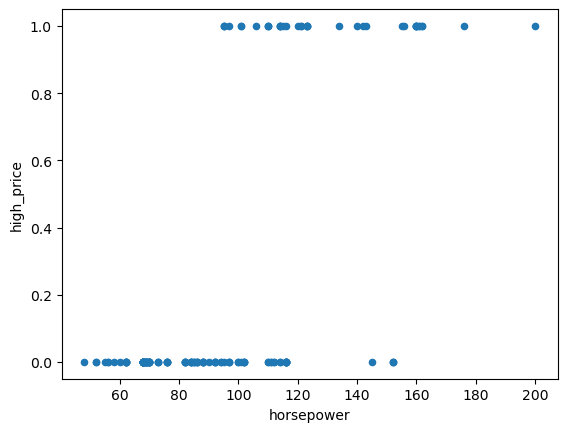

In [26]:
autos.plot.scatter('horsepower', 'high_price')

<Axes: xlabel='z', ylabel='hz'>

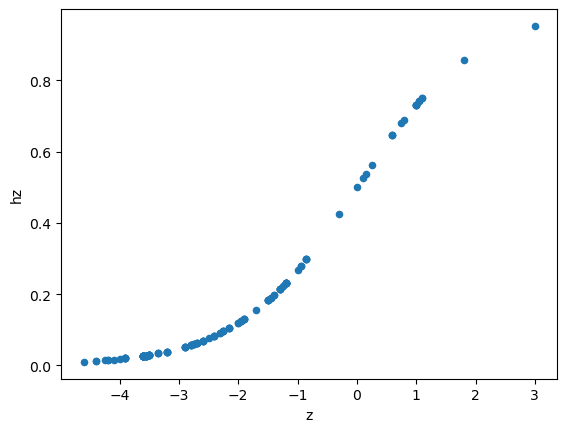

In [27]:
beta0 = -7
beta1 = 0.05
autos['z'] = autos['horsepower'].apply(lambda x: beta0 + (x * beta1))
autos['hz'] = 1 / (1 + np.exp(-autos['z']))
autos.plot.scatter('z', 'hz')

## Finding the Best Coefficients: The Log-Loss Function

### Why We Need a Different Approach

In linear regression, we have a simple formula to calculate the best coefficients:

$$\hat{\beta}_{\text{linreg}} = (X^T X)^{-1} X^T Y$$

This comes from minimizing the **Sum of Squared Errors**:

$$L_{\text{linreg}}(\beta) = \sum_{i=1}^{n} (Y_i - \beta_0 - \beta_1 X)^2$$

Unfortunately, **logistic regression has no such formula!** We can't just plug in our data and get the answer. Instead, we need to use an optimization algorithm.

### The Log-Loss Cost Function

For logistic regression, we use a different cost function called **log-loss** (or binary cross-entropy). It has two forms depending on whether the actual outcome is 0 or 1:

$$L_{\text{logreg}}(\beta) = \begin{cases}
-\log(h(\beta_0 + \beta_1 X)) & \text{if } y = 1 \\
-\log(1 - h(\beta_0 + \beta_1 X)) & \text{if } y = 0
\end{cases}$$

where $h$ is our sigmoid function:

$$h(\beta_0 + \beta_1 X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}$$

### Why Two Forms?

Think of it like a game where you get points (or lose points):
- **When the actual answer is 1** (high-priced car):
  - If your prediction is close to 1: Small penalty (low cost)
  - If your prediction is close to 0: **BIG penalty!** (high cost goes to infinity)

- **When the actual answer is 0** (not high-priced):
  - If your prediction is close to 0: Small penalty (low cost)
  - If your prediction is close to 1: **BIG penalty!** (high cost goes to infinity)

The log-loss **rewards correct predictions** and **severely punishes confident but wrong predictions**.

### How We Find the Coefficients

Even though we don't have a simple formula, we can still use calculus to find derivatives of the log-loss. This allows us to use **gradient descent** - an algorithm that takes small steps to find the coefficients that minimize the total log-loss across all our data.

## Interpreting Logistic Regression: From Probability to Log-Odds

Like linear regression, logistic regression is highly interpretable. To understand how predictors influence the outcome, we need to examine the relationship between the coefficients and different representations of the outcome.

### The Logit Function (Inverse Sigmoid)

We start with our two equations:

$$z = \beta_0 + \beta_1 x$$

$$E[Y] = h(z) = \frac{1}{1 + e^{-z}}$$

To interpret coefficients directly, we need to invert the sigmoid function:

$$h^{-1}(E[Y]) = z = \beta_0 + \beta_1 x$$

Using algebra to rearrange the sigmoid:

$$E[Y] = \frac{1}{1 + e^{-z}} \implies z = \log\left(\frac{E[Y]}{1 - E[Y]}\right) = h^{-1}(E[Y])$$

This inverse function is called the **logit function** (or **link function** for logistic regression).

### Three Ways to Express Binary Outcomes

**1. Probability**: $E[Y]$ 
- The probability that $Y = 1$ (e.g., probability of high price)
- Range: $[0, 1]$
- Easy to interpret but limited range

**2. Odds**: $\frac{E[Y]}{1 - E[Y]}$
- Ratio of probability of success to probability of failure
- Range: $[0, \infty)$
- Better range but still bounded below

**3. Log-Odds (Logit)**: $\log\left(\frac{E[Y]}{1 - E[Y]}\right)$
- Logarithm of the odds
- Range: $(-\infty, \infty)$
- **This is what logistic regression actually models!**

### Key Insight

$$\log\left(\frac{E[Y]}{1 - E[Y]}\right) = \beta_0 + \beta_1 x$$

Changes in the predictor $x$ directly change the **log-odds**, which in turn influence the odds and probability. This structure is similar to linear regression, but the left side represents log-odds instead of the raw outcome.

In [30]:
prob = np.mean(y_train)
odds = prob / (1- prob)
print(f"probability is {prob}")
print(f"the odds are {odds}")


probability is 0.25984251968503935
the odds are 0.351063829787234


In [35]:
autos['L'] = 0
autos.loc[autos["high_price"] == 1, "L"] = -np.log(autos["hz"])
autos.loc[autos["high_price"] == 0, "L"] = -np.log(1 - autos["hz"])
loss = float(autos["L"].sum())
loss

/var/folders/8y/ys14x8n12rg_41kgl1fqn_xm0000gp/T/ipykernel_46712/4023014216.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.50192908 1.70141328 0.69314718 2.08302108 2.08302108 1.27695641
 1.27695641 0.15297761 1.31326169 1.20586507 1.20586507 1.20586507
 1.20586507 0.38687101 0.31326169 0.04858735 0.31326169 2.35020656
 2.35020656 2.2601846  2.35020656 0.64439666 0.62095705 1.70141328
 1.70141328 0.31326169 0.31326169 1.46328247 0.30005848 0.30005848
 0.37110067 1.54100845 1.54100845 0.28733533 0.28733533 1.54100845
 0.31326169 0.85435524 1.86778603 1.54100845]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  autos.loc[autos["high_price"] == 1, "L"] = -np.log(autos["hz"])


57.50637598249044

In [36]:
def gradient_descent(x, y, init=np.array([0.0, 0.0]), iterations=1000, 
                     learning_rate=0.0001, stopping_threshold=1e-6):
    """
    Implements gradient descent to find optimal logistic regression coefficients.
    
    Parameters:
    -----------
    x : array-like
        Array of predictor values (features)
    y : array-like
        Array of binary outcomes (0 or 1)
    init : np.array, default=[0.0, 0.0]
        Initial guesses for [β₀ (intercept), β₁ (slope)]
    iterations : int, default=1000
        Maximum number of iterations to run
    learning_rate : float, default=0.0001
        Step size for parameter updates (how big each step is)
    stopping_threshold : float, default=1e-6
        Minimum change in cost to continue iterating (stopping criterion)
    
    Returns:
    --------
    np.array : Optimized parameters [β₀, β₁] that minimize log-loss
    """
    
    # Initialize parameters with our starting guesses
    beta0, beta1 = init[0], init[1]
    
    # Initialize the cost (log-loss) to infinity so we enter the loop
    previous_cost = np.inf
    
    # Main gradient descent loop
    for i in range(iterations):
        
        # Step 1: Calculate z for all observations using current parameters
        # z = β₀ + β₁ * x
        z = beta0 + beta1 * x
        
        # Step 2: Apply sigmoid function to get predicted probabilities
        # h(z) = 1 / (1 + e^(-z))
        hz = 1 / (1 + np.exp(-z))
        
        # Step 3: Calculate the total log-loss cost
        # For y=1: cost = -log(h(z))
        # For y=0: cost = -log(1 - h(z))
        # We use np.where to select the appropriate formula for each observation
        log_loss = np.where(y == 1, -np.log(hz), -np.log(1 - hz))
        current_cost = np.sum(log_loss)
        
        # Step 4: Check if we've converged (cost stopped changing significantly)
        cost_change = abs(previous_cost - current_cost)
        
        if cost_change < stopping_threshold:
            # We've converged! Return the optimal parameters
            print(f"Converged after {i} iterations")
            return np.array([beta0, beta1])
        
        # Step 5: Calculate gradients (how much to change each parameter)
        # Gradient for β₀: ∂L/∂β₀ = Σ(h(z) - y)
        # Gradient for β₁: ∂L/∂β₁ = Σ(h(z) - y) * x
        gradient_beta0 = np.sum(hz - y)
        gradient_beta1 = np.sum((hz - y) * x)
        
        # Step 6: Update parameters by taking a small step in the direction
        # that reduces the cost (negative gradient direction)
        beta0 = beta0 - learning_rate * gradient_beta0
        beta1 = beta1 - learning_rate * gradient_beta1
        
        # Step 7: Store current cost for next iteration's comparison
        previous_cost = current_cost
    
    # If we reach max iterations without converging, return best parameters found
    print(f"Reached maximum iterations ({iterations})")
    return np.array([beta0, beta1])